In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize': (7,3), 'figure.dpi': 120})

In [7]:
blobs = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/cluster_blobs.csv')

In [8]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

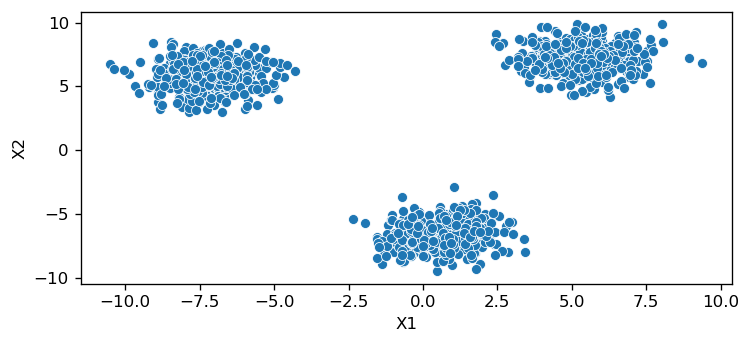

In [9]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [10]:
moons = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/cluster_moons.csv')

In [11]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

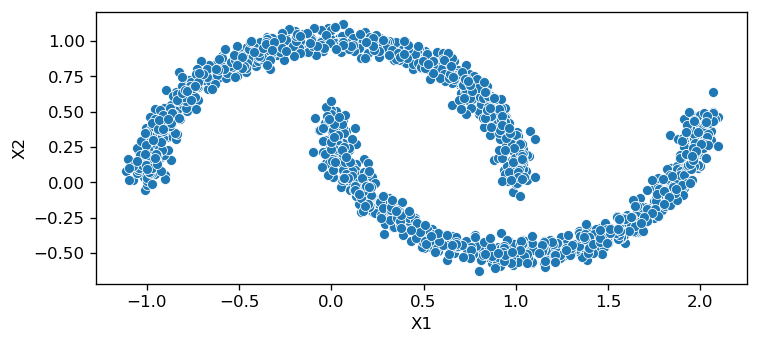

In [12]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [14]:
circles = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/cluster_circles.csv')

In [15]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

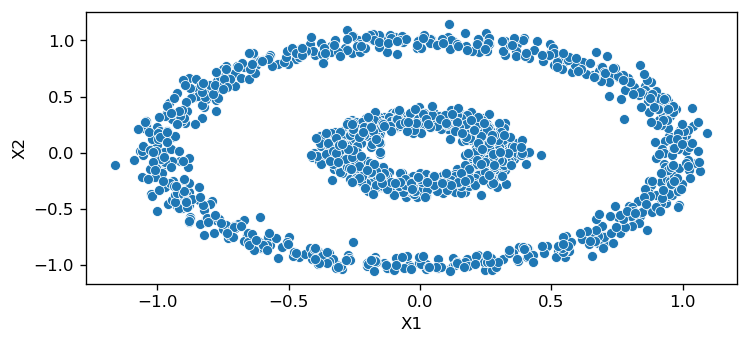

In [16]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [17]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

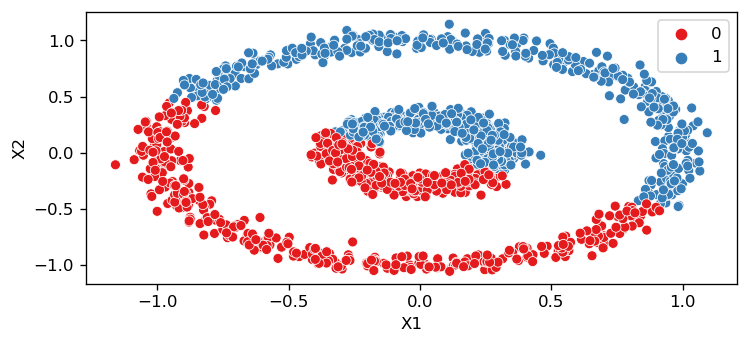

In [23]:
display_categories(model, circles)

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
model = DBSCAN()

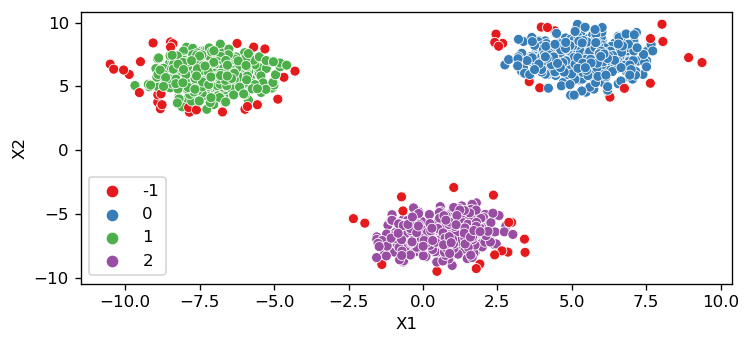

In [26]:
display_categories(model, blobs)

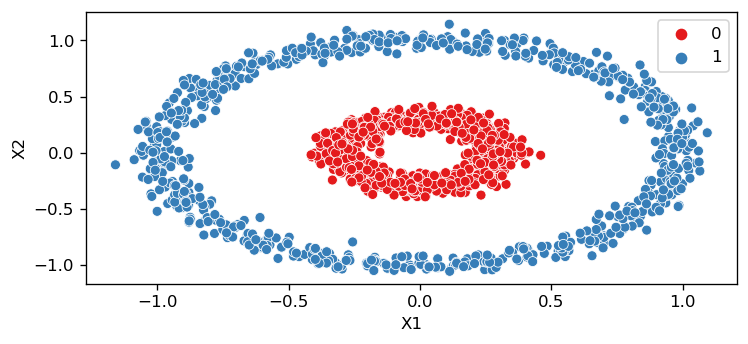

In [29]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)

In [30]:
two_blobs = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/cluster_two_blobs.csv')

In [31]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<AxesSubplot:xlabel='X1', ylabel='X2'>

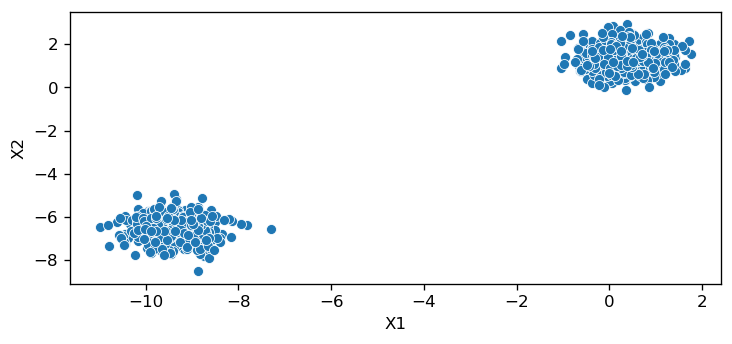

In [32]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

In [33]:
two_blobs_outliers = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

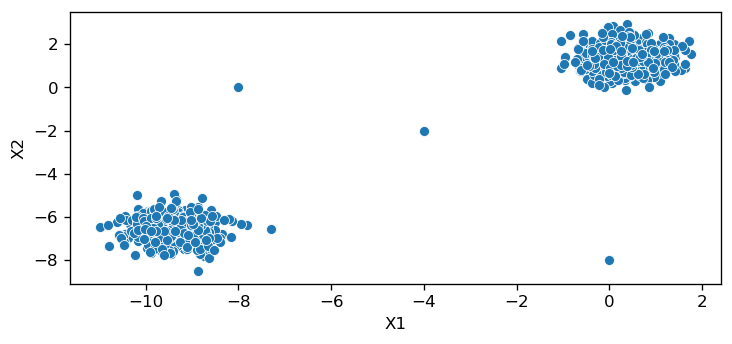

In [34]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

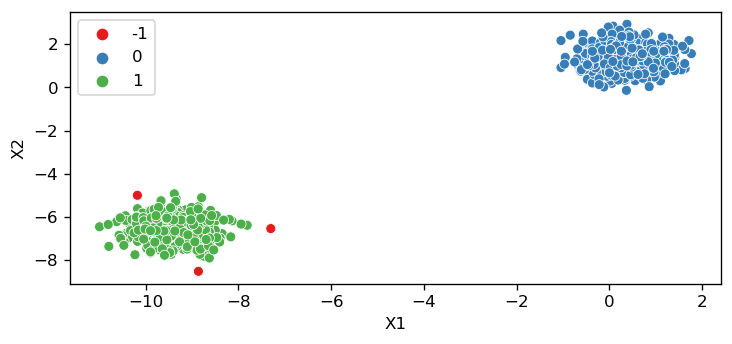

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

display_categories(dbscan, two_blobs)

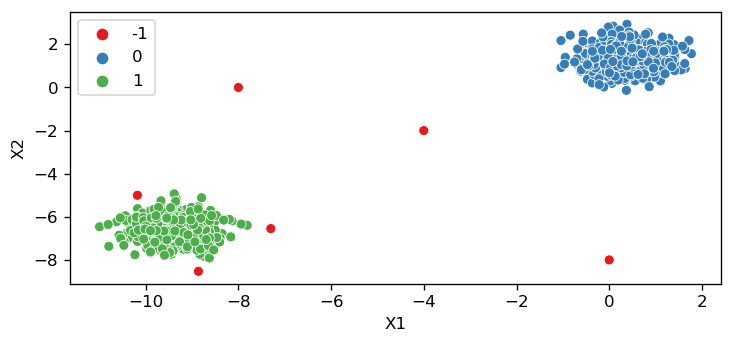

In [36]:
display_categories(dbscan, two_blobs_outliers)

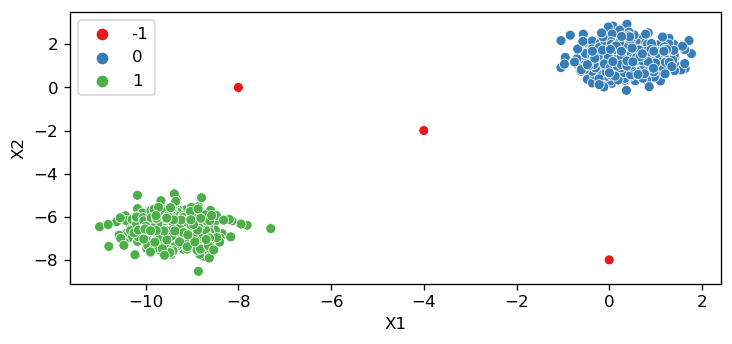

In [40]:
dbscan = DBSCAN(eps=1)

display_categories(dbscan, two_blobs_outliers)

In [41]:
# total outliers found
np.sum(dbscan.labels_ == -1)

3

In [43]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # total outliers found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percent of points classified as outliers
    perc_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outlier)

<AxesSubplot:>

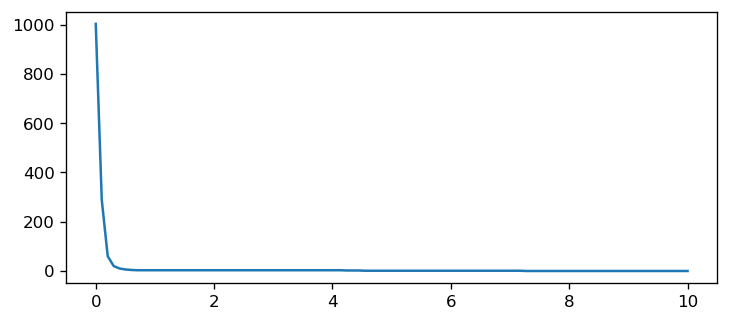

In [44]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)